# Echelle Spectrum Example
The [Sandiford Echelle Spectrograph](https://mcdonaldobservatory.org/research/instruments/sandiford-cassegrain-echelle-spectrometer) sits at the cassegrain focus on the [Otto Struve 2.1 meter telescope](https://mcdonaldobservatory.org/research/telescopes/Struve) at McDonald Observatory.

The eccentricities of this instrument combined with the particular interesting spectral region of the stellar targets means this example may have limited utitlity for some.

But it was tough for me to get my spectrum to display without some help and this notebook may help someone else.

Thank you to the members of [Python users in Astronomy](https://www.facebook.com/groups/astropython/) Facebook group.

I used [AstroPy](http://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials%20filterfits) and [SpecUtils](https://github.com/astropy/specutils) to access the spectrum in this example.

In [1]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
alpha = 0.8

In [2]:
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()
from specutils import Spectrum1D
from specutils.spectra import Spectrum1D, SpectralRegion

In [3]:
from astropy.utils.data import download_file

In [4]:
"""
Some reduction was done using IRAF. 
Only the spectral order of interest was flattened as well. 
The spectrum contains all the orders but only 1 is displayed here.
"""
image_file = download_file('http://jimmynewland.com/astronomy/pastel/hd141531.fits', cache=True )

In [5]:
# Requires file name and spectral order and returns data table for only the requested order.
def get_spectrum(file, order):
    image_file = file
    
    f = fits.open(image_file)
    specdata = f[0].data
    f.close()
    
    return specdata[order]

In [6]:
# This was spectral region 6600 A to 6800 A
# SES instrument has unique picket fence issues affecting some spectral regions.
spectrum = get_spectrum(image_file,23)

In [7]:
#Manually create the spectral region with steps matching the IRAF output
wave = np.empty_like(spectrum)
i = 6600
for n in range(0,len(wave)):
    wave[n] = i/1.0
    i = i + 80/len(wave)
w1 = wave * u.AA # convert wavelength to Angstroms

I noticed the flux array was reversed from the IRAF display. [IRAF Spectrum display for HD 141531](http://jimmynewland.com/astronomy/pastel/iraf-hd141531.jpg)

In [8]:
f0 = spectrum * u.Unit('erg cm-2 s-1 AA-1')

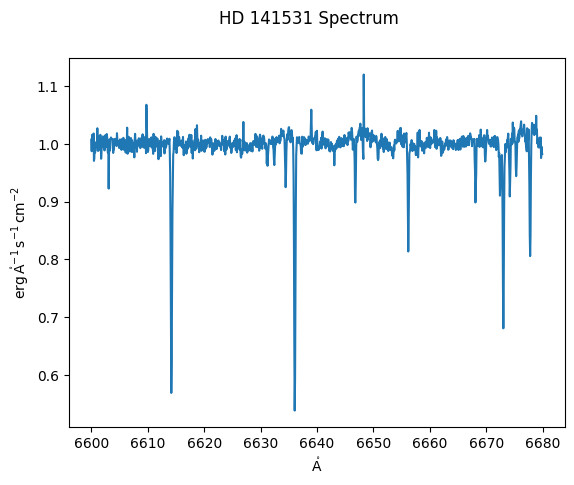

In [9]:
fig, ax = plt.subplots()
fig.suptitle('HD 141531 Spectrum')
ax.plot(w1,f0)

plt.show()

In [10]:
#Reverse the flux array so the lowest wavelength is in the lowest index.
f1 = spectrum * u.Unit('erg cm-2 s-1 AA-1')
f1 = f1[::-1]

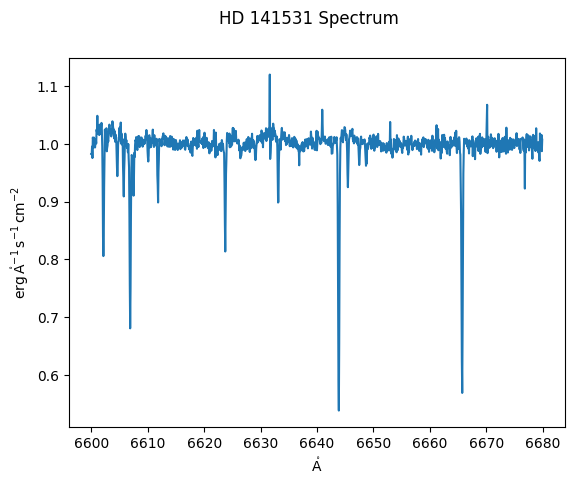

In [11]:
fig, ax = plt.subplots()
fig.suptitle('HD 141531 Spectrum')
ax.plot(w1,f1)

plt.show()

Notice that the wavelength axis requires some minor adjustments. The wavelength calibration from the IRAF reduction was imperfect. Using a lab-reference wavelength atlas helped to match known features such as Ni I at 6643.638 A.

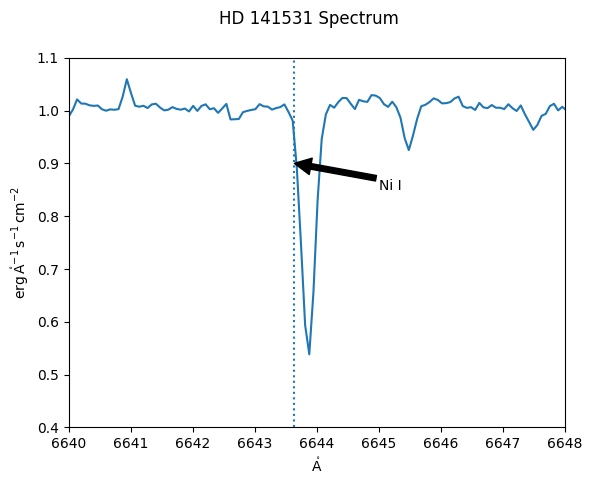

In [12]:
# Display the Ni I absorption line
fig, ax = plt.subplots()
fig.suptitle('HD 141531 Spectrum')
ax.plot(w1,f1)

ax.set_xlim([6640,6648])
ax.set_ylim([0.4,1.1])

plt.axvline(x=6643.638,ls=':')
ax.annotate('Ni I', xy=(6643.638, 0.9), xytext=(6645, 0.85),
            arrowprops=dict(facecolor='black')
            )

plt.show()

In [13]:
wave = np.empty_like(spectrum)
i = 6600
for n in range(0,len(wave)):
    wave[n] = i/1.0
    i = i + 80/len(wave)
wave = wave - 0.253 # align Ni I line with known wavelength
w2 = wave * u.AA # convert wavelength to Angstroms

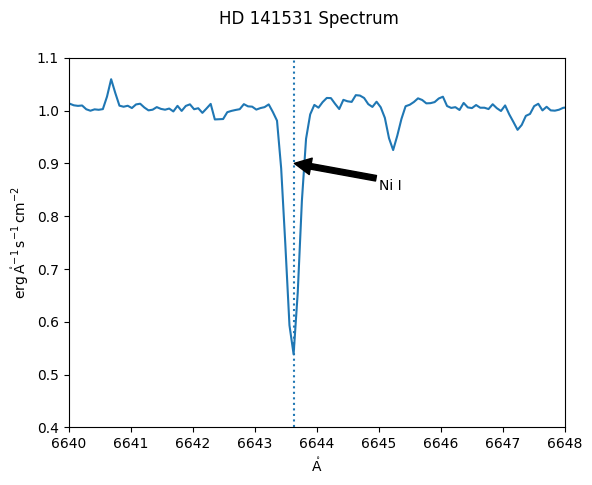

In [14]:
# Display the Ni I absorption line with wavelength adjustment
fig, ax = plt.subplots()
fig.suptitle('HD 141531 Spectrum')
ax.plot(w2,f1)

ax.set_xlim([6640,6648])
ax.set_ylim([0.4,1.1])

plt.axvline(x=6643.638,ls=':') # Mark correct placement for Ni I
ax.annotate('Ni I', xy=(6643.638, 0.9), xytext=(6645, 0.85),
            arrowprops=dict(facecolor='black')
            )
plt.show()